In [2]:
from scipy import fft, integrate
import numpy as np
import matplotlib.pyplot as plt

## Fourier series

Suppose we have a function $f(t)$ defined on the interval $[0, T]$ and periodic outside that interval (so that $f(t + T) = f(t)$). If the function satisfies certain conditions, we can write it as a sum of sine and cosine functions whose frequencies are multiples of $\omega$ (that is, the frequencies are discrete and separated by some interval, and we're using $\omega$ to represent the separation between them).

If we take $\omega = \frac{2\pi}{T}$, then this becomes

$$
f(t) = \sum_{n=0}^{\infty} A_ncos\left(\frac{2n\pi t}{T}\right) + B_nsin\left(\frac{2n\pi t}{T}\right)
$$

If we define an inner product between two functions on $[0, T]$ as 

$$
\left\langle f,g \right\rangle = \int_{0}^{T}f(t)g(t)dt
$$

then this series can be understood as a decomposition of the function into a set of orthogonal basis functions. To find the coefficients $A_n$ and $B_n$, we take the inner product of the function with each of the basis functions ($a_n$ and $b_n$ are normalizing constants):

$$
A_n = a_n \int_{0}^{T}f(t) cos\left(\frac{2n\pi t}{T}\right)dt \\
B_n = b_n \int_{0}^{T}f(t) sin\left(\frac{2n\pi t}{T}\right)dt
$$

To normalize the coefficients, we set the norm of each basis function (i.e. its inner product with itself) to 1. So we get

$$
a_n \int_{0}^{T}cos^2\left(\frac{2n\pi t}{T}\right)dt = 1
$$

which gives

$$
a_0 = \frac{1}{T} \\
a_n = \frac{2}{T}
$$

and 

$$
b_n \int_{0}^{T}sin^2\left(\frac{2n\pi t}{T}\right)dt = 1
$$

which gives

$$
b_n = \frac{2}{T}
$$

So we finally get

$$
A_0 = \frac{1}{T} \int_{0}^{T}f(t) dt \\
A_n = \frac{2}{T} \int_{0}^{T}f(t) cos\left(\frac{2n\pi t}{T}\right)dt \quad (n \geq 1) \\
B_n = \frac{2}{T} \int_{0}^{T}f(t) sin\left(\frac{2n\pi t}{T}\right)dt \quad (n \geq 1)
$$

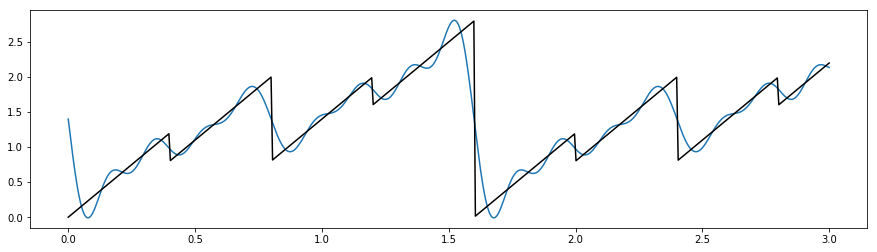

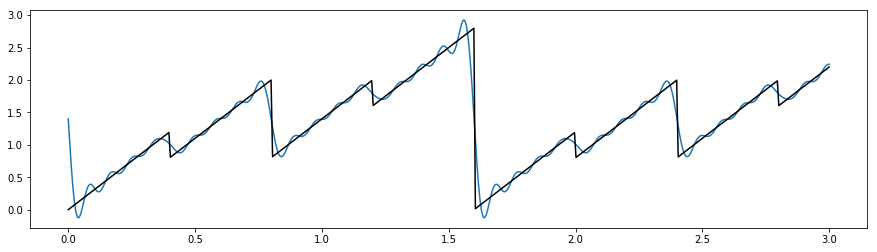

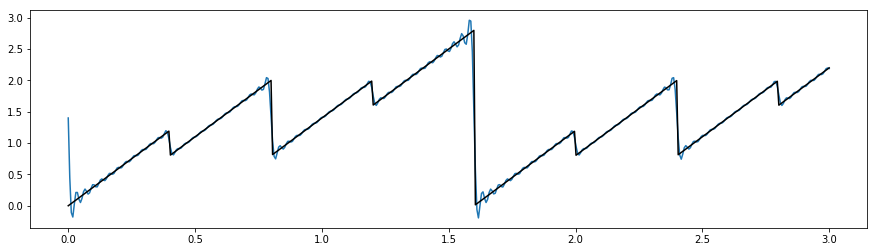

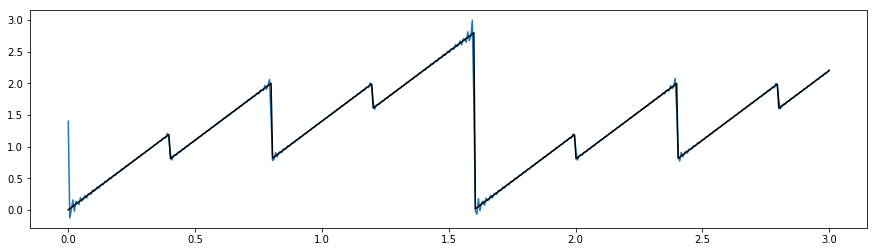

In [38]:
# Plots the Fourier approximation of a function along with the function
# change f and T below to plot a different function

f = lambda x: x % 0.4 + x % 0.8 + x % 1.6
T = 1.6

def fourier_a(f, T, k):
    if k == 0:
        return 1/T*integrate.quad(lambda x: f(x), 0, T, limit=100)[0]
    else:
        return 2/T*integrate.quad(lambda x: f(x)*np.cos(2*np.pi*k*x/T), 0, T, limit=100)[0]

def fourier_b(f, T, k):
    return 2/T*integrate.quad(lambda x: f(x)*np.sin(2*np.pi*k*x/T), 0, T, limit=100)[0]

def fourier_series(f, T, n=20):
    x = [xi for xi in np.linspace(0, 2.9999, 500)]
    y = [f(xi) for xi in x]
    ya = np.zeros(len(x))
    
    for k in range(n):
        A = fourier_a(f, T, k)
        B = fourier_b(f, T, k)
        for i in range(len(x)):
            ya[i] = ya[i] + A*np.cos(2*np.pi*k*x[i]/T) + B*np.sin(2*np.pi*k*x[i]/T)
            
    return (x, y, ya)

def plot(x, y, ya):
    plt.figure(figsize=(15, 4))
    plt.plot(x, ya)
    plt.plot(x, y, c='black')
    
# Plot Fourier series with 10, 20, 50 and 100 frequency components

plot(*fourier_series(f, T, 10))
plot(*fourier_series(f, T, 20))
plot(*fourier_series(f, T, 50))
plot(*fourier_series(f, T, 100))

## Fourier transform

The Fourier series can be used to approximate a periodic function, but not an aperiodic one. This is because there's a minimum frequency of $\omega$ in the functions that make up the series, and hence a maximum period of $\frac{2\pi}{\omega}$. Beyond this, the approximation calculated by the series will repeat.

To handle aperiodic functions, we need to ensure there's no minimum frequency. So we turn $\omega$ into a continuous instead of a discrete variable, and we turn the summation of the series into an integral.

We combine the sines and cosines into a single type of basis function by allowing the basis functions and their coefficients to be complex. Instead of separate coefficients $A_n$ and $B_n$ for cosines and sines of the same frequency, we now have a single complex coefficient for each frequency. This coefficient is given by the Fourier transform of the function evaluated at that frequency, which is

$$
F(\omega) = \int_{-\infty}^{\infty}f(t) \cdot e^{-2\pi i \omega t} dt
$$

To reconstruct the function from its Fourier transform, we can do exactly what we did with the Fourier series, except it's an integration instead of a sum. This is called the inverse Fourier transform, and is given by

$$
f(t) = \int_{-\infty}^{\infty}F(\omega) \cdot e^{2\pi i \omega t} d\omega
$$

In the above, we leave $2\pi$ in the exponent in order to avoid having to calculate a normalizing constant - the Fourier transform and the inverse Fourier transform are also symmetrical that way.

## Discrete Fourier transform 

In order to work with the Fourier transform on a computer, we have to convert it into a discrete form. Both $\omega$ and $t$ become discrete variables and the signal is treated as periodic in both the time domain and the frequency domain. Because a discrete variable over a finite domain can only take on a finite number of values, we denote this number by $N$. We consider the values of the function and its Fourier transform to be sets of $N$ sampled points, denoted by $\{x_n\}$ for samples in the time domain and $\{X_m\}$ for samples in the frequency domain.

The discrete Fourier transform is given by

$$
\large
X_m = \sum_{n=0}^{N-1}x_n \cdot e^{\frac{-2\pi imn}{N}}
$$

and the inverse DFT by

$$
\large
x_n = \frac{1}{N}\sum_{m=0}^{N-1}X_m \cdot e^{\frac{2\pi imn}{N}}
$$

Both of these are basically linear transformations - the DFT and the inverse DFT can be understood as linear transformations converting $\{x_n\}$ into $\{X_m\}$ and vice versa. The matrices associated with this transformation are $N \times N$ matrices with $e^{-2\pi i \frac{mn}{N}}$ and $e^{2\pi i \frac{mn}{N}}$ as the elements.

In [19]:
# Calculate DFT and inverse DFT matrices

def w(n, k):
    return np.exp(-complex("j")*2*np.pi*k/n)

def dft_matrix(n):
    mat = np.ones((n, n), dtype=np.complex_)
    for i in range(1, n):
        mat[i] = (np.array([w(n, i*j) for j in range(n)]))
    return mat

def inverse_dft_matrix(n):
    mat = np.ones((n, n), dtype=np.complex_)
    for i in range(1, n):
        mat[i] = (np.array([w(n, -i*j) for j in range(n)]))
    return mat

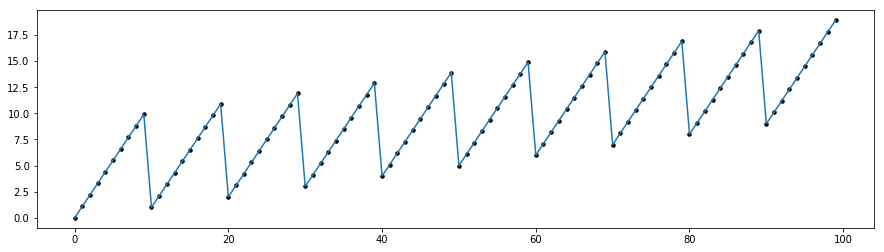

In [45]:
f = lambda x: x/10 + x % 10
N = 100

x = [f(i) for i in range(N)]
u = np.dot(dft_matrix(N), x)

u0 = np.dot(inverse_dft_matrix(N),u)/N

plt.figure(figsize=(15,4))
plt.scatter(np.linspace(0, N-1, N), x, c='black', s=12)
plt.plot(np.linspace(0, N-1, N), u0)